# **Project 36: Books Genre Predictor**

***pandas*** : *A powerful library for data manipulation and analysis, particularly for working with structured data in DataFrames.*

***numpy*** : *A library for numerical computing in Python, providing support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions.*

***warnings*** : *A module for managing warning messages in Python, allowing you to control how warnings are issued, displayed, or ignored.*

***seaborn*** : *A statistical data visualization library based on Matplotlib, providing a high-level interface for creating informative and attractive graphs.*

***matplotlib*** : *A plotting library in Python, used for creating static, interactive, and animated visualizations in Python.*

***nltk*** : *The Natural Language Toolkit, a library for working with human language data (text) in Python, supporting tasks like tokenization, parsing, classification, and more.*

***re*** : *A module for working with regular expressions in Python, providing tools for matching, searching, and manipulating strings based on patterns.*

# **Data Loading**

**Importing these libraries for Text Analytics, Text Preprocessing.**

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re

**Suppresses all warnings in a Python script.**

In [2]:
warnings.simplefilter("ignore")

**Reads the first 5 rows of the BooksDataSet.csv file into a DataFrame and displays them.**

In [3]:
df = pd.read_csv("/content/BooksDataSet.csv")
df.head(5)

,Unnamed: 0,book_id,book_name,genre,summary
0,0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...
4,4,3173445,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...


**Drops the "Unnamed: 0" column from the DataFrame and updates it in place, then displays the first 5 rows.**

In [4]:
df.drop(columns = ["Unnamed: 0"], inplace = True)
df.head(5)

,book_id,book_name,genre,summary
0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...
3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...
4,3173445,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...


**Displays a concise summary of the DataFrame, including the number of non-null entries, column names, data types, and memory usage.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   book_id    3000 non-null   int64 
 1   book_name  3000 non-null   object
 2   genre      3000 non-null   object
 3   summary    3000 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.9+ KB


**Returns the total number of missing (null) values in each column of the DataFrame.**

In [6]:
df.isnull().sum()

,0
book_id,0
book_name,0
genre,0
summary,0


# **Data Visualization**

**Returns the dimensions of the DataFrame as a tuple, showing the number of rows and columns.**

In [7]:
df.shape

(3000, 4)

**Creates a bar plot to visualize the count of each genre in the DataFrame, using a color palette called "Set1" and setting the figure size to 10x5 inches.**

<Axes: xlabel='genre', ylabel='count'>

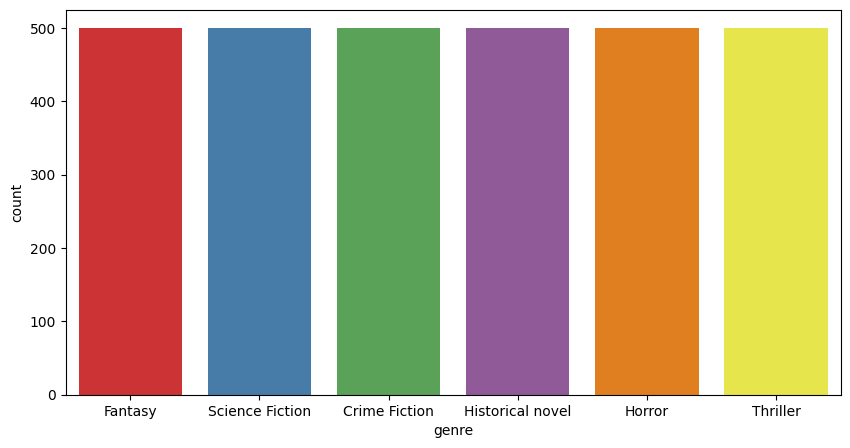

In [8]:
plt.figure(figsize = (10, 5))
sns.countplot(x = df["genre"], palette="Set1")

**Creates a pie chart displaying the distribution of genres in the DataFrame, with percentages shown for each slice and labels corresponding to genre names.**

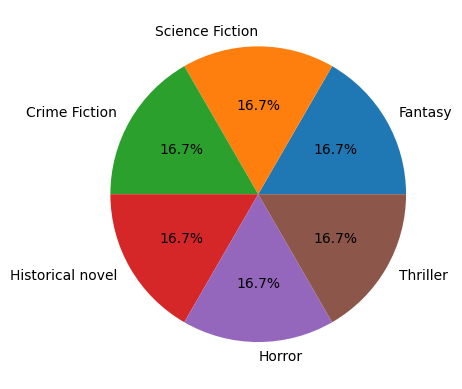

In [9]:
genre_counts = df["genre"].value_counts()
plt.pie(genre_counts, autopct="%1.1f%%", labels=genre_counts.index)
plt.show()

**Returns the summary (text) from the second row (index 1) of the summary column in the DataFrame.**

In [10]:
df["summary"].iloc[1]

' As the book opens, Jason awakens on a school bus, unable to remember who or where he is, or anything about his past. He is sitting next to Piper McLean and Leo Valdez, who call him by name and say they are his girlfriend and best friend respectively. All three are part of a class field trip to the Grand Canyon, and after they arrive, a classmate Dylan turns into a Venti (Storm Spirit) and attacks the trio and their trip leader, Coach Gleeson Hedge. In the ensuing fight, Jason surprises everyone, including himself, when one of his coins turns into a sword which he uses to battle the storm spirits. Coach Hedge, who reveals himself to be a satyr during the fight, is taken captive by a fleeing spirit. After the battle, a flying chariot arrives to rescue the trio, but one of the people in it, Annabeth, is upset when she discovers that her missing boyfriend, Percy Jackson, is not there as she expected. Annabeth, seeking Percy, was told in a vision from the goddess Hera to look there for th

# **Data Cleaning - Text Preprocessing**

**Cleans the text in the summary column by removing single quotes and non-alphabetic characters, converting the text to lowercase, and then returns the cleaned summary for the second row (index 1).**

In [11]:
def cleantext(text):

    text = re.sub("'\'", "", text)
    text = re.sub("[^a-zA-Z]", " ", text)
    text = " ".join(text.split())
    text = text.lower()
    return text

df["summary"] = df["summary"].apply(lambda x: cleantext(x))
df["summary"].iloc[1]

'as the book opens jason awakens on a school bus unable to remember who or where he is or anything about his past he is sitting next to piper mclean and leo valdez who call him by name and say they are his girlfriend and best friend respectively all three are part of a class field trip to the grand canyon and after they arrive a classmate dylan turns into a venti storm spirit and attacks the trio and their trip leader coach gleeson hedge in the ensuing fight jason surprises everyone including himself when one of his coins turns into a sword which he uses to battle the storm spirits coach hedge who reveals himself to be a satyr during the fight is taken captive by a fleeing spirit after the battle a flying chariot arrives to rescue the trio but one of the people in it annabeth is upset when she discovers that her missing boyfriend percy jackson is not there as she expected annabeth seeking percy was told in a vision from the goddess hera to look there for the guy with one shoe but this 

**Displays a bar plot of the 25 most frequent words in the summary column of the DataFrame and returns a DataFrame with word frequencies.**

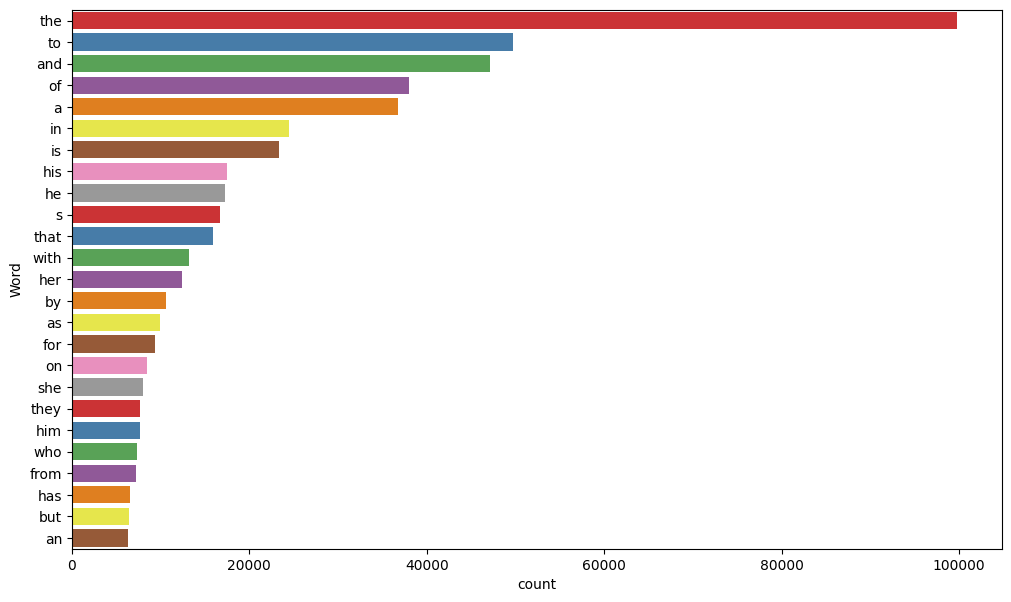

In [12]:
def show_most_frequent_words(text, no_of_words):

    allwords = " ".join([char for char in text])
    allwords = allwords.split()
    fdist = nltk.FreqDist(allwords)

    wordsdf = pd.DataFrame({"word": list(fdist.keys()), "count": list(fdist.values())})

    df = wordsdf.nlargest(columns = "count", n = no_of_words)

    plt.figure(figsize=(12, 7))
    ax = sns.barplot(data = df, x = "count", y = "word", palette = "Set1")
    ax.set(ylabel = "Word")
    plt.show()

    return wordsdf

wordsdf = show_most_frequent_words(df["summary"], 25)

**Removes common stop words from the text in the summary column and returns the cleaned summary for the second row (index 1).**

In [13]:
nltk.download("stopwords")

from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

def remove_stop_words(text):

    remove_stop_words = [word for word in text.split() if word not in stop_words]
    return " ".join(remove_stop_words)

df["summary"] = df["summary"].apply(lambda x:remove_stop_words(x))
df["summary"].iloc[1]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'book opens jason awakens school bus unable remember anything past sitting next piper mclean leo valdez call name say girlfriend best friend respectively three part class field trip grand canyon arrive classmate dylan turns venti storm spirit attacks trio trip leader coach gleeson hedge ensuing fight jason surprises everyone including one coins turns sword uses battle storm spirits coach hedge reveals satyr fight taken captive fleeing spirit battle flying chariot arrives rescue trio one people annabeth upset discovers missing boyfriend percy jackson expected annabeth seeking percy told vision goddess hera look guy one shoe turns jason shoe destroyed fight jason piper leo told demigods taken back camp half blood meet greek demigod children like leo revealed son hephaestus piper daughter aphrodite jason son zeus though hera tells champion jason later discovers full brother zeus demigod daughter thalia grace hunter artemis shortly arrive three given quest rescue hera captured set soon dis

**Applies lemmatization to the text in the summary column, reducing words to their base forms, and returns the lemmatized summary for the second row (index 1).**

In [14]:
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer
Lemma = WordNetLemmatizer()

def lematizing(sentence):

    StemSentence = ""
    for word in sentence.split():
        stem = Lemma.lemmatize(word)
        StemSentence += stem
        StemSentence += " "

    StemSentence = StemSentence.strip()
    return StemSentence

df["summary"] = df["summary"].apply(lambda x:lematizing(x))
df["summary"].iloc[1]

[nltk_data] Downloading package wordnet to /root/nltk_data...


'book open jason awakens school bus unable remember anything past sitting next piper mclean leo valdez call name say girlfriend best friend respectively three part class field trip grand canyon arrive classmate dylan turn venti storm spirit attack trio trip leader coach gleeson hedge ensuing fight jason surprise everyone including one coin turn sword us battle storm spirit coach hedge reveals satyr fight taken captive fleeing spirit battle flying chariot arrives rescue trio one people annabeth upset discovers missing boyfriend percy jackson expected annabeth seeking percy told vision goddess hera look guy one shoe turn jason shoe destroyed fight jason piper leo told demigod taken back camp half blood meet greek demigod child like leo revealed son hephaestus piper daughter aphrodite jason son zeus though hera tell champion jason later discovers full brother zeus demigod daughter thalia grace hunter artemis shortly arrive three given quest rescue hera captured set soon discover enemy wor

**Applies stemming to the text in the summary column, reducing words to their root forms, and returns the stemmed summary for the second row (index 1).**

In [15]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stemming(sentence):

    stemmed_sentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemmed_sentence += stem
        stemmed_sentence += " "

    stemmed_sentence = stemmed_sentence.strip()
    return stemmed_sentence

df["summary"] = df["summary"].apply(lambda text:stemming(text))
df["summary"].iloc[1]

'book open jason awaken school bu unabl rememb anyth past sit next piper mclean leo valdez call name say girlfriend best friend respect three part class field trip grand canyon arriv classmat dylan turn venti storm spirit attack trio trip leader coach gleeson hedg ensu fight jason surpris everyon includ one coin turn sword us battl storm spirit coach hedg reveal satyr fight taken captiv flee spirit battl fli chariot arriv rescu trio one peopl annabeth upset discov miss boyfriend perci jackson expect annabeth seek perci told vision goddess hera look guy one shoe turn jason shoe destroy fight jason piper leo told demigod taken back camp half blood meet greek demigod child like leo reveal son hephaestu piper daughter aphrodit jason son zeu though hera tell champion jason later discov full brother zeu demigod daughter thalia grace hunter artemi shortli arriv three given quest rescu hera captur set soon discov enemi work order gaea overthrow god quest encount thalia hunter look perci thalia

**Creates a dictionary mapping each unique genre in the genre column to a unique integer code and prints the dictionary.**

In [16]:
book_list = list(df["genre"].unique())
encode = [i for i in range(len(book_list))]
mapper = dict(zip(book_list, encode))
print(mapper)

{'Fantasy': 0, 'Science Fiction': 1, 'Crime Fiction': 2, 'Historical novel': 3, 'Horror': 4, 'Thriller': 5}


**Maps the genre names in the genre column to their corresponding integer codes using the mapper dictionary and displays the unique integer codes.**

In [17]:
df["genre"] = df["genre"].map(mapper)
df["genre"].unique()

array([0, 1, 2, 3, 4, 5])

**Creates a document-term matrix using the CountVectorizer, with specific parameters to filter and limit the features, and applies it to the summary column of the DataFrame.**

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

count_vec = CountVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words = "english")

bagofword_vec = count_vec.fit_transform(df["summary"])
bagofword_vec

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 245378 stored elements and shape (3000, 1000)>

**Returns the column names of the DataFrame.**

In [19]:
df.columns

Index(['book_id', 'book_name', 'genre', 'summary'], dtype='object')

**Saves the DataFrame to a CSV file named traineddata.csv, excluding the index column.**

In [29]:
df.to_csv("traineddata.csv", index=False)

# **Model Building**

**Selects the genre column from the DataFrame and assigns it to the variable y.**

In [20]:
y = df[['genre']]

**Imports functions for splitting data into training and testing sets and for generating a classification report to evaluate model performance.**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

**Splits the document-term matrix and genre labels into training and testing sets, with 80% of the data used for training, and returns the shapes of the training and testing feature matrices.**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(bagofword_vec, y, train_size = 0.80)

X_train.shape, X_test.shape

((2400, 1000), (600, 1000))

**1: Import LogisticRegression from sklearn.linear_model: Imports the logistic regression model class for classification tasks.**

**2: Initialize LogReg with C=1.0 and fit_intercept=True: Sets up the logistic regression model with a regularization strength of 1.0 and includes an intercept in the model.**

**3: Train the model on X_train and y_train: Fits the logistic regression model using the training features and labels.**

**4: Predict labels for X_test, generate, and print the classification report: Makes predictions on the test set, then generates and displays a report of classification metrics.**

In [23]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(C=1.0, fit_intercept=True)

LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)

CR = classification_report(y_pred, y_test)
print("Logistic Classification Report:")
print("")
print(CR)

Logistic Classification Report:

              precision    recall  f1-score   support

           0       0.60      0.60      0.60       111
           1       0.72      0.66      0.69       104
           2       0.69      0.66      0.68       121
           3       0.57      0.55      0.56        83
           4       0.48      0.62      0.54        80
           5       0.51      0.47      0.48       101

    accuracy                           0.60       600
   macro avg       0.60      0.60      0.59       600
weighted avg       0.60      0.60      0.60       600



**1: Import RandomForestClassifier from sklearn.ensemble: Imports the random forest classifier model for ensemble learning tasks.**

**2: Initialize RFC with max_samples=10, n_estimators=100, n_jobs=-1: Sets up the random forest classifier with 10 samples per split, 100 trees, and uses all available CPU cores.**

**3: Train the model on X_train and y_train: Fits the random forest model using the training features and labels.**

**4: Predict labels for X_test, generate, and print the classification report: Makes predictions on the test set, then generates and displays a report of classification metrics.**

In [24]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(max_samples=10, n_estimators=100, n_jobs = -1)

RFC.fit(X_train, y_train)

y_pred = RFC.predict(X_test)

CR = classification_report(y_pred, y_test)
print("Random Forest Classification Report:")
print("")
print(CR)

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.14      0.26      0.18        58
           1       0.70      0.22      0.34       301
           2       0.27      0.34      0.30        92
           3       0.11      0.15      0.13        59
           4       0.09      0.20      0.12        44
           5       0.09      0.17      0.12        46

    accuracy                           0.23       600
   macro avg       0.23      0.22      0.20       600
weighted avg       0.43      0.23      0.26       600



**1: Import DecisionTreeClassifier from sklearn.tree: Imports the decision tree classifier model for classification tasks.**

**2: Initialize DTC with max_depth=100, max_features=3, random_state=42: Sets up the decision tree classifier with a maximum depth of 100, using up to 3 features for splitting, and a fixed random seed for reproducibility.**

**3: Train the model on X_train and y_train: Fits the decision tree model using the training features and labels.**

**4: Predict labels for X_test, generate, and print the classification report: Makes predictions on the test set, then generates and displays a report of classification metrics.**

In [25]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(max_depth=100, max_features=3, random_state=42)

DTC.fit(X_train, y_train)

y_pred = DTC.predict(X_test)

CR = classification_report(y_pred, y_test)
print("Decision Tree Classification Report:")
print("")
print(CR)

Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.24      0.29      0.27        92
           1       0.30      0.28      0.29       105
           2       0.41      0.37      0.39       127
           3       0.26      0.25      0.26        84
           4       0.19      0.22      0.21        89
           5       0.27      0.24      0.26       103

    accuracy                           0.28       600
   macro avg       0.28      0.28      0.28       600
weighted avg       0.29      0.28      0.28       600



**1: Import MultinomialNB from sklearn.naive_bayes: Imports the multinomial naive Bayes classifier model for text classification.**

**2: Initialize MNB with alpha=1.0: Sets up the multinomial naive Bayes model with a smoothing parameter of 1.0.**

**3: Train the model on X_train and y_train: Fits the multinomial naive Bayes model using the training features and labels.**

**4: Predict labels for X_test, generate, and print the classification report: Makes predictions on the test set, then generates and displays a report of classification metrics.**

In [27]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB(alpha=1.0)

MNB.fit(X_train, y_train)

y_pred = MNB.predict(X_test)

CR = classification_report(y_pred, y_test)
print("Multinomial NB Classification Report:")
print("")
print(CR)

Multinomial NB Classification Report:

              precision    recall  f1-score   support

           0       0.69      0.75      0.72       103
           1       0.77      0.65      0.71       113
           2       0.71      0.68      0.69       121
           3       0.71      0.65      0.68        88
           4       0.59      0.67      0.63        91
           5       0.51      0.56      0.53        84

    accuracy                           0.66       600
   macro avg       0.66      0.66      0.66       600
weighted avg       0.67      0.66      0.67       600



# **Conclusion:**

**After evaluating the performance of various classification models, the following classification reports were obtained:**

**Multinomial Naive Bayes Classification Report:**

| Genre             | Precision |
|-------------------|-----------|
| Fantasy           | 0.69      |
| Science Fiction   | 0.77      |
| Crime Fiction     | 0.71      |
| Historical Novel  | 0.71      |
| Horror            | 0.59      |
| Thriller          | 0.51      |

**Logistic Regression Classification Report:**

| Genre             | Precision |
|-------------------|-----------|
| Fantasy           | 0.60      |
| Science Fiction   | 0.72      |
| Crime Fiction     | 0.69      |
| Historical Novel  | 0.57      |
| Horror            | 0.48      |
| Thriller          | 0.51      |

**Random Forest Classification Report:**

| Genre             | Precision |
|-------------------|-----------|
| Fantasy           | 0.14      |
| Science Fiction   | 0.70      |
| Crime Fiction     | 0.11      |
| Historical Novel  | 0.27      |
| Horror            | 0.09      |
| Thriller          | 0.09      |

**Decision Tree Classification Report:**

| Genre             | Precision |
|-------------------|-----------|
| Fantasy           | 0.24      |
| Science Fiction   | 0.30      |
| Crime Fiction     | 0.41      |
| Historical Novel  | 0.26      |
| Horror            | 0.19      |
| Thriller          | 0.27      |


**The Multinomial Naive Bayes model outperforms the other models in terms of precision across all genres. It achieved the highest precision scores for genres such as Science Fiction (0.77) and Crime Fiction (0.71). In contrast, the Random Forest and Decision Tree models displayed lower precision values and less consistent performance across different genres.**

**Based on these results, the Multinomial Naive Bayes model is selected as the best predictor for our genre classification task, offering the most reliable and balanced performance.**

# **Save Model**

**Saves the MNB model and count_vec vectorizer to a file named Finalized-Model.pickle using pickle. Opens the file in write-binary mode and stores the objects.**

In [28]:
import pickle

with open("Finalized-Model.pickle", "wb") as file:
    pickle.dump((MNB, count_vec), file)